In [19]:
# load all necessary libraries
import pandas as pd
pd.set_option('max_colwidth', 100)
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk, re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv("finbank_data.csv")
df.head()

,text,label
0,Cash Flow from Operations for the most recent quarter also reached a eight year low,negative
1,The economic occupancy rate of Sponda 's property portfolio rose to 91.2 % from 88.8 % in 2006,positive
2,The Company operates through four principal divisions : Consumer Packaging ; Office Papers ; Spe...,neutral
3,The contract has been allotted as per lowest price criteria,neutral
4,"The process , technology , project management , basic engineering and quality assurance within F...",neutral


# Database size: there are 14,780 news headings in the database

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14780 non-null  object
 1   label   14780 non-null  object
dtypes: object(2)
memory usage: 231.1+ KB


# Labels are imbalanced, skewing towards positive and neutral

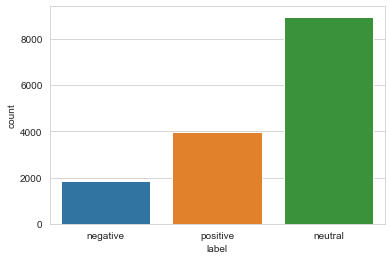

In [24]:
sns.set_style("whitegrid")
sns.countplot(df.label)

In [6]:
df1 = df['label'].value_counts()
df1

neutral     8951
positive    3988
negative    1841
Name: label, dtype: int64

# Text length varies, with majority concentrated in 10~30 words. 

In [7]:
df['length'] = df['text'].str.count(' ')
df['length'].describe()

count    14780.000000
mean        21.906698
std         10.044391
min          1.000000
25%         14.000000
50%         20.000000
75%         28.000000
max         80.000000
Name: length, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002334DE92460>,
      dtype=object)

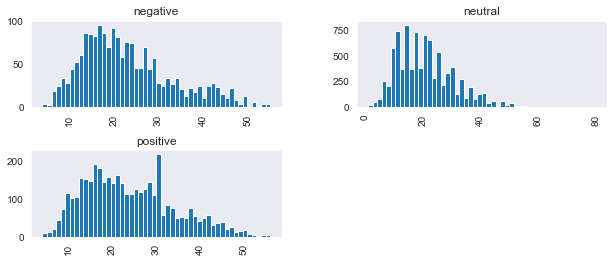

In [8]:
df.hist(column='length', by='label', bins=50,figsize=(10,4))

# Frequently used words are typical for financial market news

Text(0.5, 1.0, 'Frequently used words')

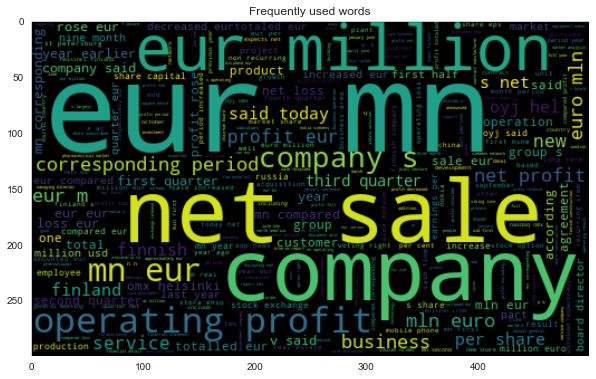

In [21]:
#remove stop words, perform lemmatization and remove symbols from the texts 
lemma = WordNetLemmatizer()
stop = stopwords.words('english')
def Text_clean(txt):
    txt = txt.lower()
    words = nltk.word_tokenize(txt)
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in stop])
    words_joined = "".join(words)
    text = re.sub('[^a-z]',' ',words_joined) #remove symbols 
    return text  

df['text_clean'] = df['text'].apply(Text_clean)

# plotting wordcloud
plt.figure(figsize = (10,12)) #
wc = WordCloud(max_words = 500 , width = 500 , height = 300).generate(" ".join(df.text_clean))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Frequently used words')
